### Notebook for Testing the Computational Limits of the GFE

#### This jupyter notebook was run to perform machine learning models on the COVID dataset, simulations were performed by varying the number of records processed, ranging from 0.1 million to 100 million. Processing times and computational load on the GFE were noted for each experiment. 

#### Technical Specifications of the GFE Considered for This Study:
- Processor (CPU): Model: Intel Core i7-1185G7, Speed: 3.00 GHz, Number of Cores: Quad-core (4 cores)
- Memory (RAM): Capacity: 16.0 GB (15.7 GB usable), Type: DDR4, Speed: 4.2 GHz
- Storage: Type: SSD, Capacity: 512 GB, 
- Graphics Card (GPU): Type: Integrated, Model: Intel(R) Iris(R) Xe Graphics, Memory: 8 GB 
- Operating System: Windows 11 Operating System, System type: 64-bit operating system, x64-based processor

### Key observations from present study

| Simulation No. |Records loaded (Millions) |Records processed by ML models (Millions)| Percent CPU usage | Percent GPU usage | Processing times | Key Observations  |
|:----------:|:----------:|:----------:|:----------:|:----------:|:----------:|:----------:|
| 1| 0.1| 0.05| 30| 65| 15 Secs.| Simulation runs smoothly|
| 2| 1| 0.52 | 68| 68| 6.6 Mins.| Simulation runs smoothly|
| 3| 10| 5.26| 100| 85| 72 Mins.| Simulation runs smoothly|
| 4| 30| 15.65| 100| 96| 6.6 Hrs.| GFE freezes ocasionally**|
| 5| 50| 25.92| 100| 100| >10 Hrs.| GFE freezes frequently|
| 6| 100| -| - | - | - | GFE fails to load and gives a Memory Error***|

** Ideally, loading/processing 30 million records (approximately size of 3.9 GiB) is essentially the limit of the GFE.
		 	
*** MemoryError: Unable to allocate 11.2 GiB for an array with shape (15, 100M)

<!-- <img src="..\images\RAM_startup.png" alt="Image 11" style="width: 48%; margin-right: 2%;" />
<img src="..\images/CPU_startup.png" alt="Image 12" style="width: 48%;" /> -->

### The following images shows the usage of Memory and CPU when Google Chrome, MS Teams, and MS Outlook were running on the GFE

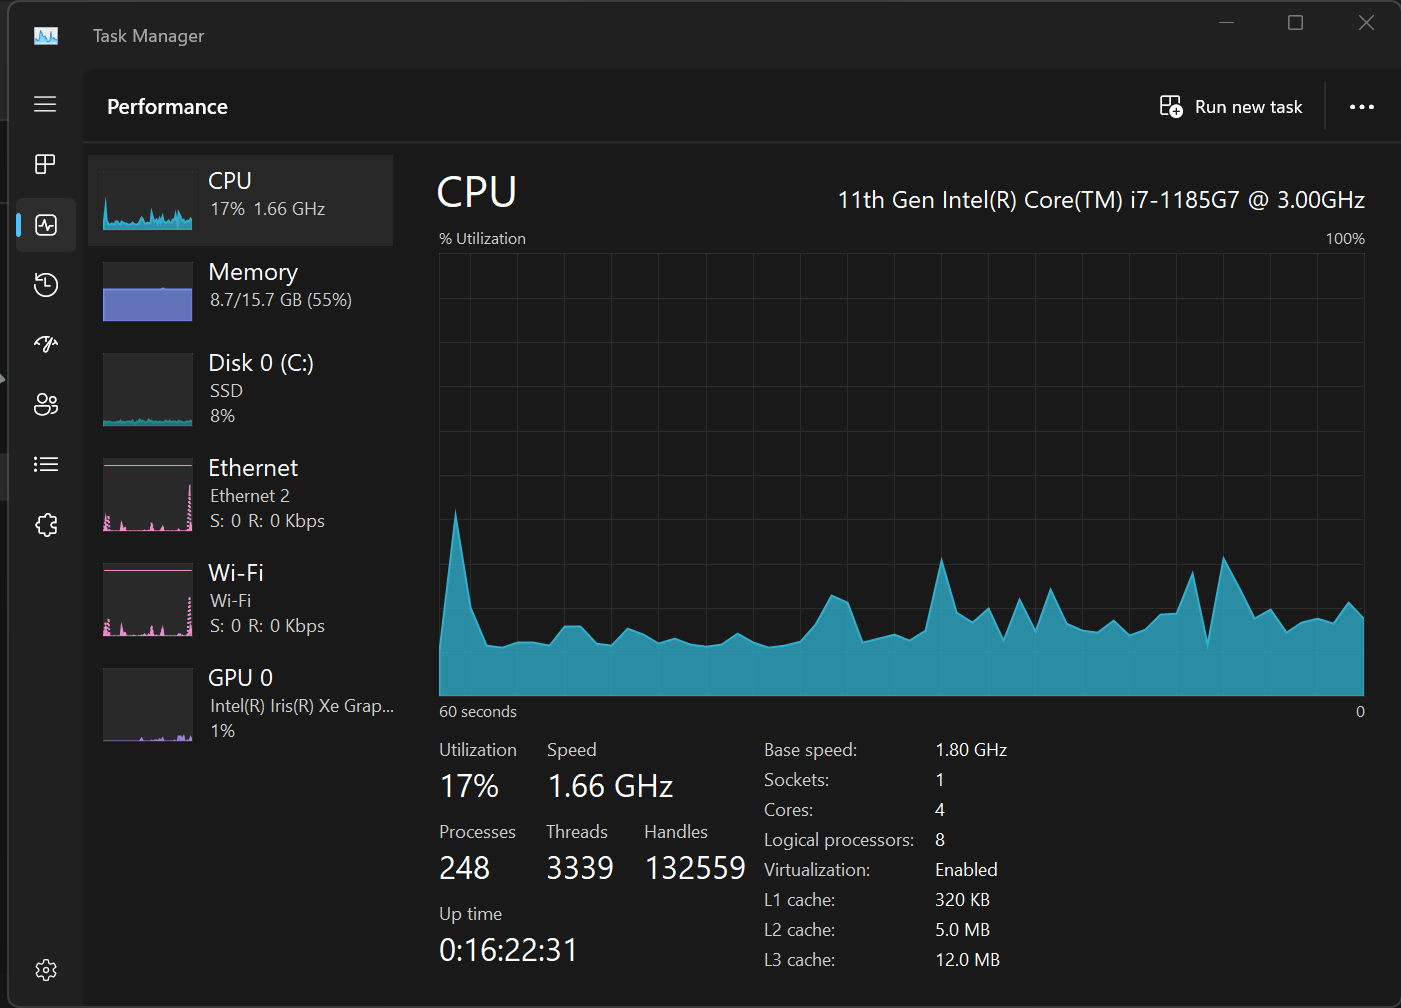
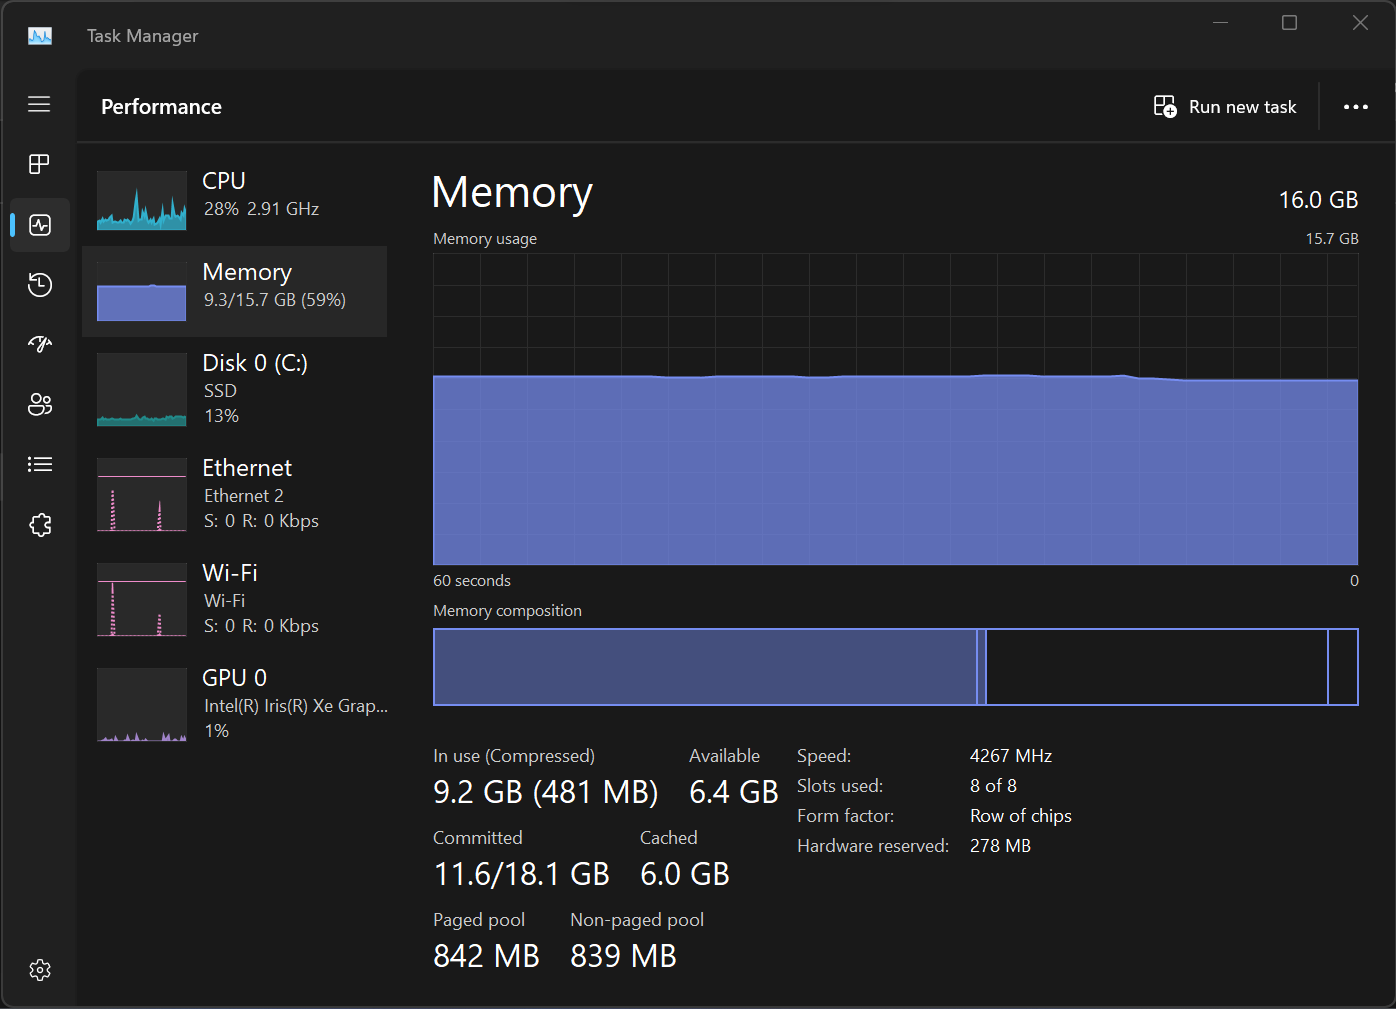

### Testing of the GFE was performed in addition to basic usage, hence approximately 6 GB of memory and 80% of CPU capacity were available for GFE testing

## Computational Load on the GFE for 30 Million Records

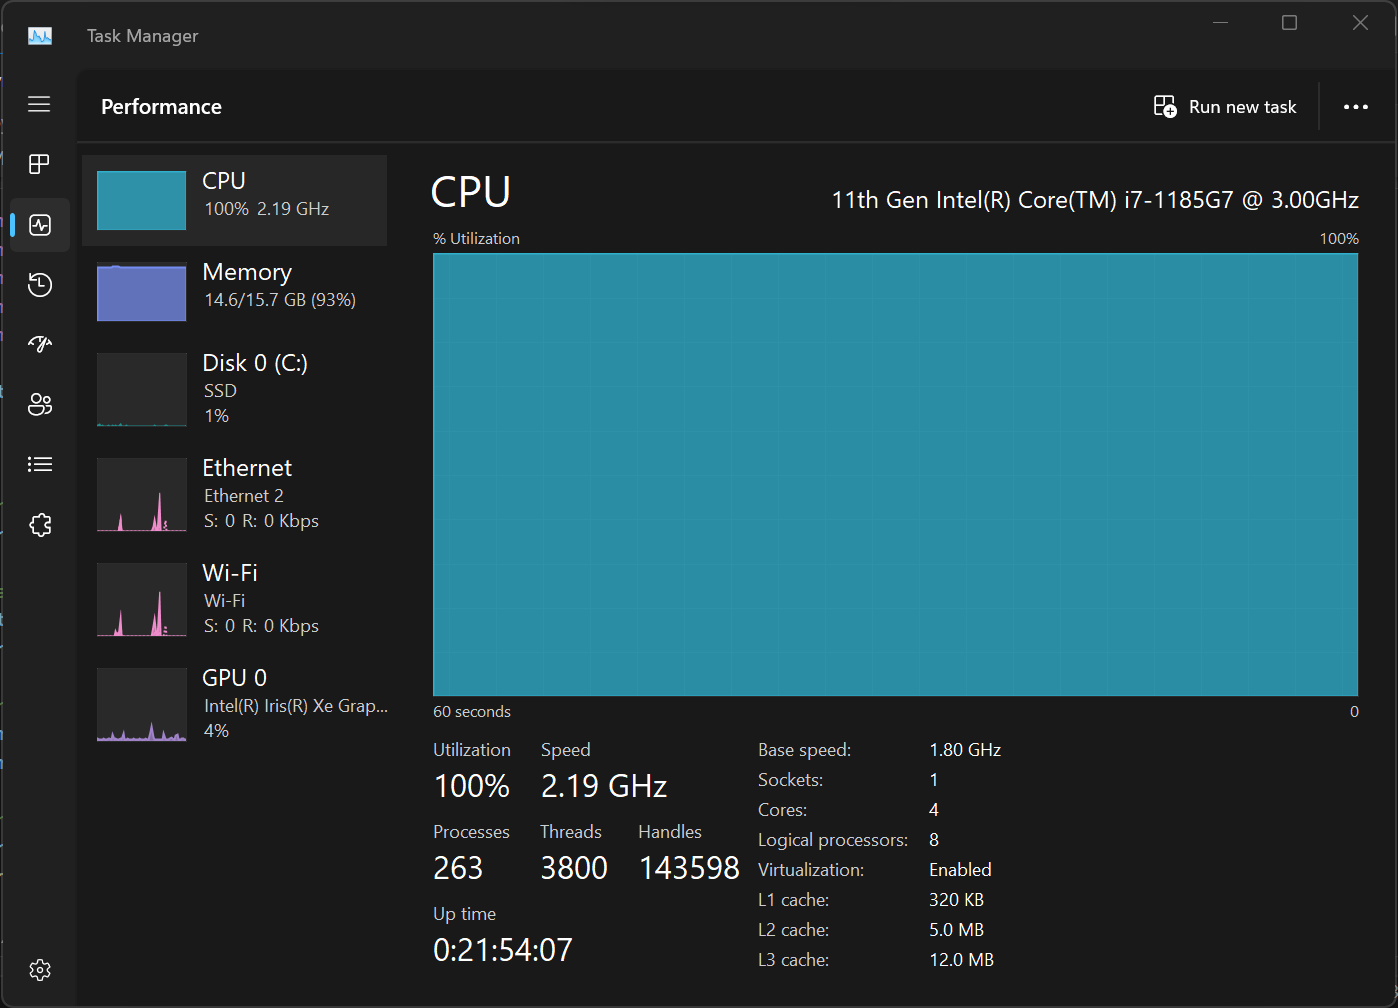
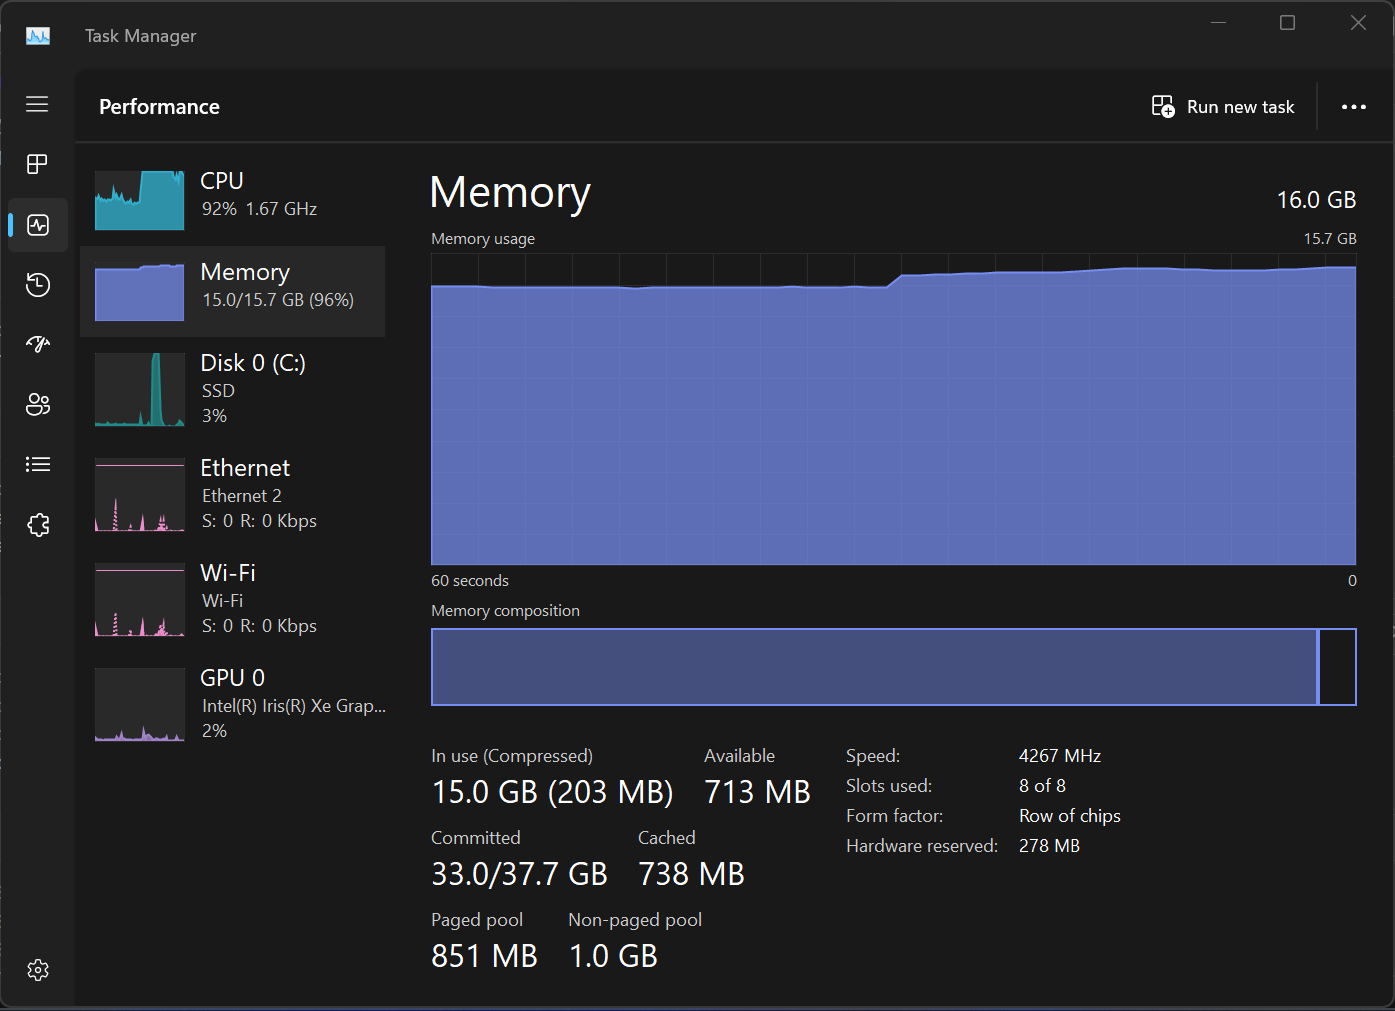

### Dataset:
- A publicly available COVID dataset was used for this study. The dataset can be downloaded from the following link:
    - https://data.cdc.gov/Case-Surveillance/COVID-19-Case-Surveillance-Public-Use-Data/vbim-akqf/about_data
- The dataset was downloaded to the local drive on the GFE (VPN needs to be turned off)
- The dataset contains 106 million records/rows and 12 fields/columns
- The actual size of the dataset is 13.8 GB

### This jupyter notebook was run to perform machine learning models on the COVID dataset.
### Several simulations were performed by varying the number of records processed, ranging from 0.1 million to 100 million.
### Processing times and computational load on the GFE were recorded for each experiment. 

In [1]:
# Importing necessary libraries
import time 
# Time at which the processing starts 
start_time=time.time()

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# displaying maximum number of columns and rows to display
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)

In [2]:
# Select the number of records to consider in the analysis 
no_of_rows_load = 100000  ## 0.1 Million
# no_of_rows_load = 1000000 ## 1 Million 
# no_of_rows_load = 10000000 ## 10 Million
# no_of_rows_load = 30000000  ## 30 million
# no_of_rows_load = 50000000  ## 50 million 
# no_of_rows_load = 100000000  ## 100 million 

In [3]:
# reading the COVID data file
file=r'C:\Users\sankar.kalaga\OneDrive - HHS Office of the Secretary\Desktop\NLP_GFE\NLP\NLP_GFE_limits\covid_data\data\COVID-19_Case_Surveillance_Public_Use_Data_with_Geography_20240403.csv'
covid_data=pd.read_csv(file, nrows=no_of_rows_load)
covid_data.head()

,case_month,res_state,state_fips_code,res_county,county_fips_code,age_group,sex,race,ethnicity,case_positive_specimen_interval,case_onset_interval,process,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn
0,2020-11,WI,55,JUNEAU,55057.0,18 to 49 years,NaN,NaN,NaN,NaN,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,No,Missing,NaN,NaN
1,2022-07,CA,6,NEVADA,6057.0,0 - 17 years,Female,NaN,NaN,NaN,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,Missing,Missing,Missing,NaN
2,2022-02,GA,13,BULLOCH,13031.0,18 to 49 years,Female,Unknown,Missing,NaN,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,Missing,Missing,Missing,NaN
3,2020-04,SC,45,RICHLAND,45079.0,18 to 49 years,Female,NaN,NaN,NaN,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,No,Missing,No,NaN
4,2021-10,MI,26,SANILAC,26151.0,18 to 49 years,Female,NaN,NaN,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,Unknown,NaN


In [4]:
# Checking the data types 
print('Data types of the each column:')
covid_data.dtypes

Data types of the each column:


case_month                          object
res_state                           object
state_fips_code                      int64
res_county                          object
county_fips_code                   float64
age_group                           object
sex                                 object
race                                object
ethnicity                           object
case_positive_specimen_interval    float64
case_onset_interval                float64
process                             object
exposure_yn                         object
current_status                      object
symptom_status                      object
hosp_yn                             object
icu_yn                              object
death_yn                            object
underlying_conditions_yn            object
dtype: object

In [5]:
# Pre-processing and cleaning:
string_columns = ['res_state', 'res_county', 'age_group', 'sex', 'race', 'ethnicity','current_status', 'symptom_status', 'hosp_yn', 'icu_yn', 'death_yn', 'underlying_conditions_yn']
# Casting the columns to string type
covid_data[string_columns] = covid_data[string_columns].astype(str)
# Filling the NANs with "Missing"
covid_data[string_columns] = covid_data[string_columns].replace('nan', 'Missing')
# Explicitly cast numeric columns before filling missing values
numeric_columns = ['state_fips_code', 'county_fips_code', 'case_positive_specimen_interval', 'case_onset_interval']
# Casting the columns to float type
covid_data[numeric_columns] = covid_data[numeric_columns].astype(float)
# Filling the NANs with -1 or "Missing" 
covid_data.fillna({'county_fips_code': -1,
                   'case_positive_specimen_interval': -1,
                   'case_onset_interval': -1,
                   'res_state': 'Missing',
                   'res_county': 'Missing',
                   'age_group': 'Missing',
                   'sex': 'Missing',
                   'race': 'Missing',
                   'ethnicity': 'Missing',
                   'current_status': 'Missing',
                   'symptom_status': 'Missing',
                   'hosp_yn': 'Missing',
                   'icu_yn': 'Missing',
                   'death_yn': 'Missing',
                   'underlying_conditions_yn': 'Missing'}, inplace=True)

# Convert date columns to datetime
covid_data['case_month'] = pd.to_datetime(covid_data['case_month'])


In [6]:
# Confirming the casted data types 
print('Data types of the each column:')
covid_data.dtypes

Data types of the each column:


case_month                         datetime64[ns]
res_state                                  object
state_fips_code                           float64
res_county                                 object
county_fips_code                          float64
age_group                                  object
sex                                        object
race                                       object
ethnicity                                  object
case_positive_specimen_interval           float64
case_onset_interval                       float64
process                                    object
exposure_yn                                object
current_status                             object
symptom_status                             object
hosp_yn                                    object
icu_yn                                     object
death_yn                                   object
underlying_conditions_yn                   object
dtype: object

In [7]:
# Display cleaned data
covid_data[covid_data['county_fips_code']==-1]

,case_month,res_state,state_fips_code,res_county,county_fips_code,age_group,sex,race,ethnicity,case_positive_specimen_interval,case_onset_interval,process,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn
508,2022-02-01,MD,24.0,Missing,-1.0,65+ years,Female,White,Missing,-1.0,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,Missing,Missing,No,Missing
779,2021-12-01,AZ,4.0,Missing,-1.0,65+ years,Female,Missing,Missing,-1.0,-1.0,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,No,Missing
837,2023-12-01,HI,15.0,Missing,-1.0,18 to 49 years,Female,Asian,Missing,-1.0,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,Missing,Missing,Missing,Missing
932,2022-07-01,TX,48.0,Missing,-1.0,50 to 64 years,Female,Black,Unknown,-1.0,-1.0,Missing,Missing,Probable Case,Missing,No,Missing,Missing,Missing
1778,2021-12-01,ME,23.0,Missing,-1.0,65+ years,Female,Missing,Missing,0.0,-1.0,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,No,Missing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98714,2023-08-01,HI,15.0,Missing,-1.0,65+ years,Male,Missing,Missing,-1.0,-1.0,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,Missing,Missing
98857,2021-03-01,MD,24.0,Missing,-1.0,50 to 64 years,Female,Missing,Missing,-1.0,-1.0,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,Missing,Missing
99007,2020-12-01,NM,35.0,Missing,-1.0,18 to 49 years,Male,Unknown,Hispanic/Latino,-1.0,-1.0,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,Missing,Missing
99734,2022-07-01,AZ,4.0,Missing,-1.0,50 to 64 years,Male,Missing,Missing,-1.0,-1.0,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,Missing,Missing


In [8]:
# Fields of interest for performing classification model
covid_data[["current_status","symptom_status"]]

,current_status,symptom_status
0,Laboratory-confirmed case,Symptomatic
1,Laboratory-confirmed case,Symptomatic
2,Laboratory-confirmed case,Symptomatic
3,Laboratory-confirmed case,Symptomatic
4,Laboratory-confirmed case,Missing
...,...,...
99995,Laboratory-confirmed case,Symptomatic
99996,Laboratory-confirmed case,Missing
99997,Laboratory-confirmed case,Symptomatic
99998,Laboratory-confirmed case,Symptomatic


In [9]:
# Assuming symptom_status has been cleaned to remove 'Missing' entries
data = covid_data[covid_data['symptom_status'] != 'Missing']
print('actual number of records condiered for the analysis:', data.shape[0])
# print(data.shape)
# checking the number of uniques values in the "symptom_status" column
data["symptom_status"].value_counts()


actual number of records condiered for the analysis: 50808


symptom_status
Symptomatic     40420
Unknown          8936
Asymptomatic     1452
Name: count, dtype: int64

In [10]:
# Converting the text fields to numeric values
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['symptom_status'])
y = data['current_status']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Train the RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_res, y_train_res)

# Predict and evaluate
y_pred = rf_model.predict(X_test)
print(classification_report(y_test, y_pred, zero_division=0))

                           precision    recall  f1-score   support

Laboratory-confirmed case       0.78      0.80      0.79      7841
            Probable Case       0.25      0.22      0.23      2321

                 accuracy                           0.67     10162
                macro avg       0.51      0.51      0.51     10162
             weighted avg       0.66      0.67      0.66     10162



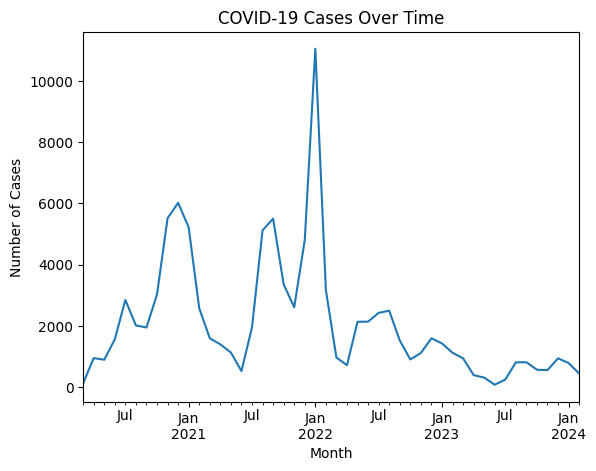

In [11]:
# Group by case_month and count occurrences
monthly_cases = covid_data.groupby(covid_data['case_month'].dt.to_period('M')).size()
# Plot trends over the period of each month
monthly_cases.plot(kind='line')
plt.title('COVID-19 Cases Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Cases')
plt.show()


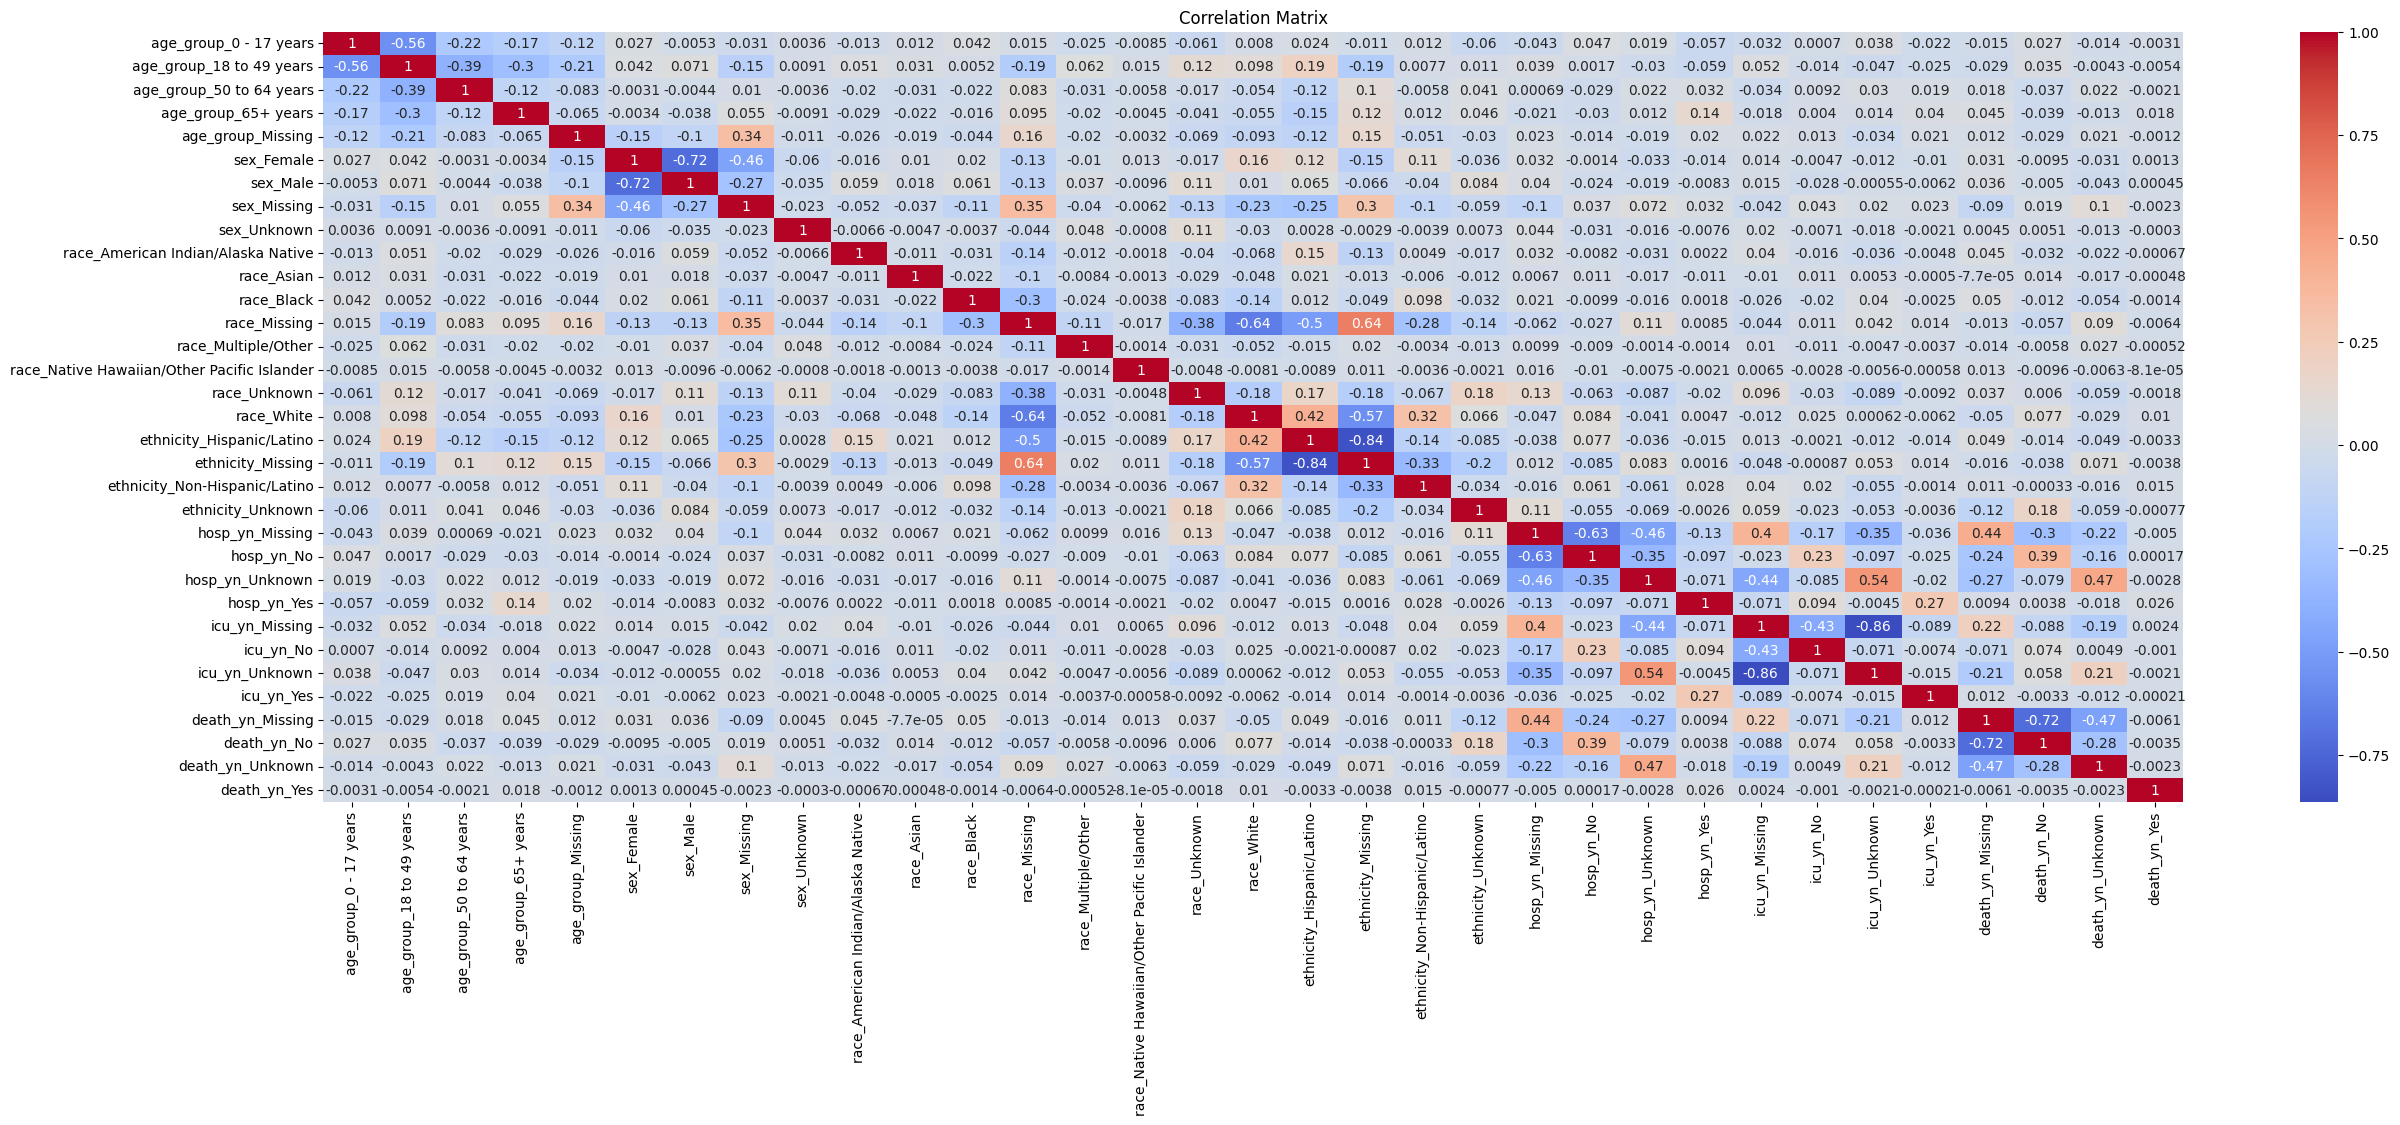

In [12]:
# Convert categorical data to numeric for correlation
numeric_data = pd.get_dummies(covid_data[['age_group', 'sex', 'race', 'ethnicity', 'hosp_yn', 'icu_yn', 'death_yn']])

# Calculate correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the correlation heatmap
plt.figure(figsize=(30, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [13]:
# Encode categorical variables
encoded_data = pd.get_dummies(covid_data[['age_group', 'sex', 'race', 'ethnicity']])

# KMeans clustering
kmeans = KMeans(n_clusters=5)
clusters = kmeans.fit_predict(encoded_data)

# Add cluster labels to the original dataset
covid_data['cluster'] = clusters

# Display cluster counts
print(covid_data['cluster'].value_counts())


cluster
2    28130
1    23009
3    22059
4    14962
0    11840
Name: count, dtype: int64


In [14]:
# Encode categorical variables
encoded_data = pd.get_dummies(covid_data[['age_group', 'sex', 'race', 'ethnicity', 'underlying_conditions_yn', 'hosp_yn', 'icu_yn', 'death_yn']])

# Prepare features and target
X = encoded_data.drop(columns=['death_yn_Missing', 'death_yn_No', 'death_yn_Unknown', 'death_yn_Yes'])
y = encoded_data[['death_yn_Missing', 'death_yn_No', 'death_yn_Unknown', 'death_yn_Yes']]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the RandomForestClassifier model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = rf_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.74      0.77     11028
           1       0.66      0.56      0.61      5945
           2       0.61      0.46      0.52      3026
           3       0.00      0.00      0.00         1

   micro avg       0.73      0.65      0.69     20000
   macro avg       0.52      0.44      0.47     20000
weighted avg       0.73      0.65      0.68     20000
 samples avg       0.65      0.65      0.65     20000



c:\Users\sankar.kalaga\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\sankar.kalaga\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [15]:
# Note the time at which simulation ends
end_time=time.time()
total_processing_time=end_time-start_time
print("Time for completing the processing:", round(total_processing_time), 'Secs')

Time for completing the processing: 12 Secs
